# Initial Configuration

In [1]:
import os
from IPython import display
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 18px;
}
.dataframe td {
    font-size: 16px;
}
</style>

# Retrieve data from Yahoo Finance

In [3]:
df = yf.download("^GSPC", start="2017-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000
...,...,...,...,...,...,...
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2264120000
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2217050000
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2369370000


In [5]:
df.to_csv("stock_data.csv")

In [6]:
read_df = pd.read_csv("stock_data.csv")
read_df.set_index("Date", inplace=True)

# Read in the Data

- Set the date as the index
- Drop the rows where at least one element is missing.

In [7]:
df = pd.read_csv("stock_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

### x - a numpy array with 1206 rows and 5 columns
### y - a numpy array that holds the labels

In [8]:
y = df.iloc[:, 4].values
x = df.drop(['Adj Close'], axis=1)
x.shape

(1259, 5)

In [9]:
y.shape

(1259,)

# Numpy Arrays
NumPy arrays have a fixed size at creation, unlike Python lists (which can grow dynamically). Changing the size of an ndarray will create a new array and delete the original. The elements in a NumPy array are all required to be of the same data type, and thus will be the same size in memory.

In [10]:
print('x.shape', x.shape)
print('y.shape', y.shape)

x.shape (1259, 5)
y.shape (1259,)


# Split the data into trainning set and testing set
### Supervised Learning

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    #random_state=0
    shuffle=False
)

# Create Random Forest

In [12]:

model = RandomForestRegressor(
    n_estimators=500,
    max_features=42,
    bootstrap=True,
)

model.fit(x_train, y_train)

RandomForestRegressor(max_features=42, n_estimators=500)

In [13]:
x_train

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,3770530000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,3764890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,3761820000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,3339890000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,3217610000
...,...,...,...,...,...
2020-09-25,3236.659912,3306.879883,3228.439941,3298.459961,3792220000
2020-09-28,3333.899902,3360.739990,3332.909912,3351.600098,3946060000
2020-09-29,3350.919922,3357.919922,3327.540039,3335.469971,3651880000


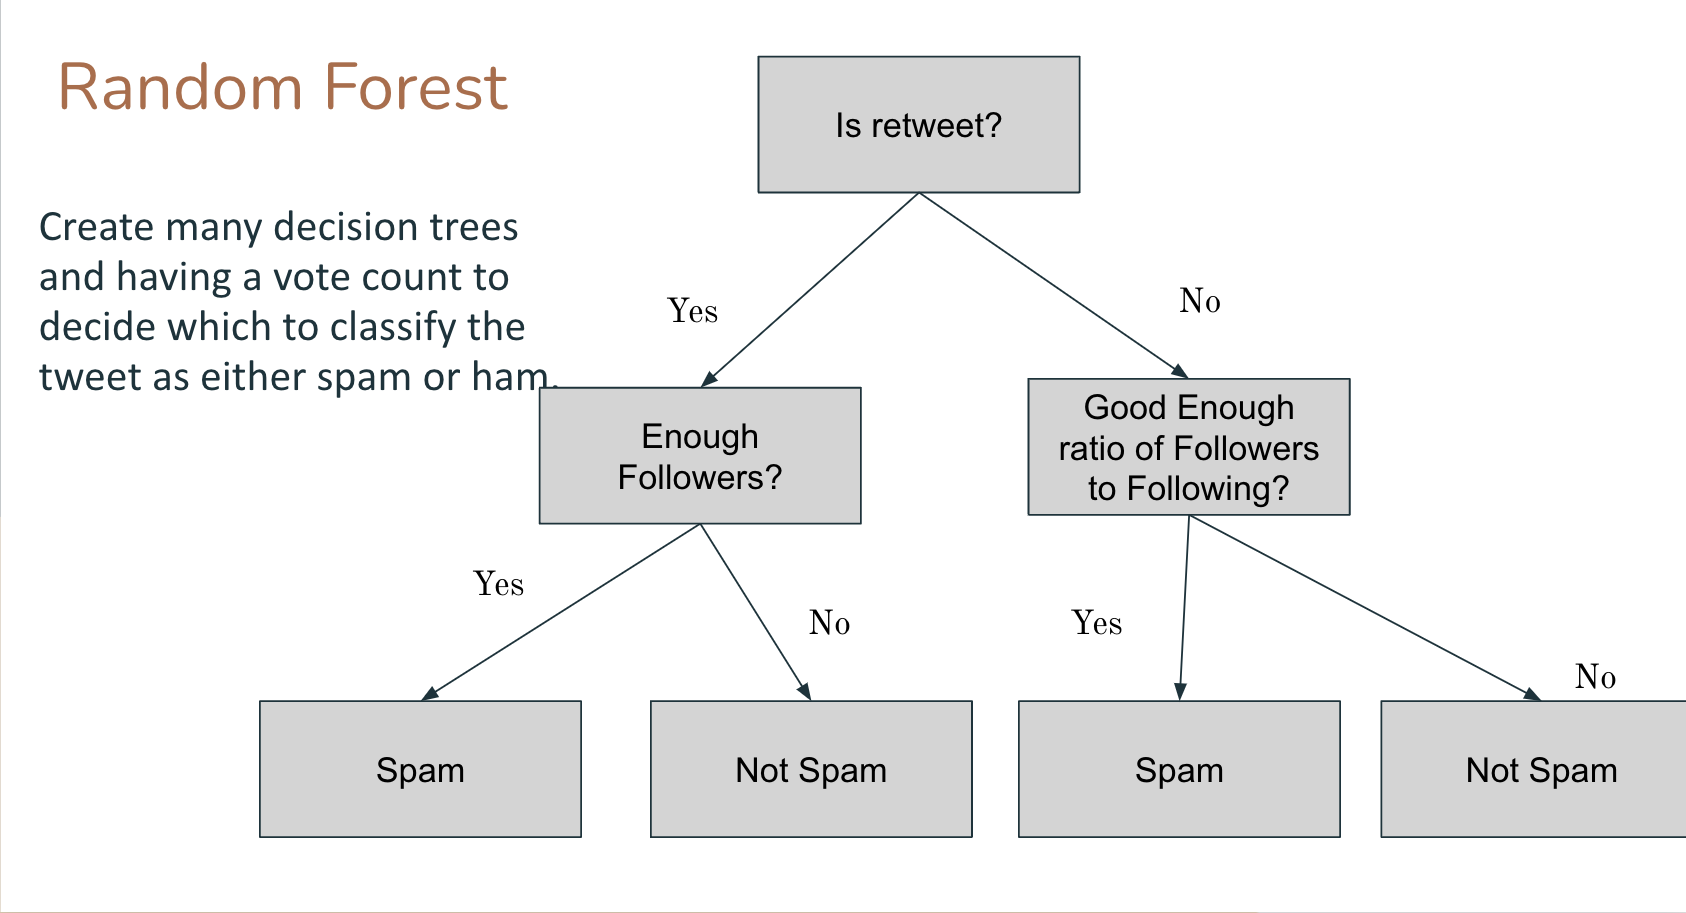

In [14]:
display.Image("./decision_tree.png")

In [15]:
predict = model.predict(x_test)

In [16]:
predict.shape

(315,)

# Hyperparameter tuning

The hyperparameters in the random forest model are either used to increase the predictive power of the model or to make the model faster. 

# Cross Validation

| n_estimators      | number of trees in the forest 
|-------------------|:------------------------------
| max_depth         | maximum depth in a tree
| min_samples_split | minimum number of samples to allow a split in an internal node
| min_samples_leaf  | specifies the minimum number of samples required to be at a leaf node
| bootstrap         |Bootstrap=True (default): samples are drawn with replacement Bootstrap=False : samples are drawn without replacement
| random_state  | generated random numbers for the random forest.

In [17]:
grid_ranges = {
    'n_estimators': [20, 50, 100, 500, 1000],
    'max_features': [3, 4, 5],
    'bootstrap': [True],
    'random_state': [1, 2, 30, 42],
}
rscv = RandomizedSearchCV(
    estimator=model,
    param_distributions=grid_ranges,
    cv=3,
    n_jobs=-1,
    verbose=1,
    n_iter=10,
)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'random_state': 1, 'n_estimators': 500, 'max_features': 5, 'bootstrap': True}


# Grid vs Random Search

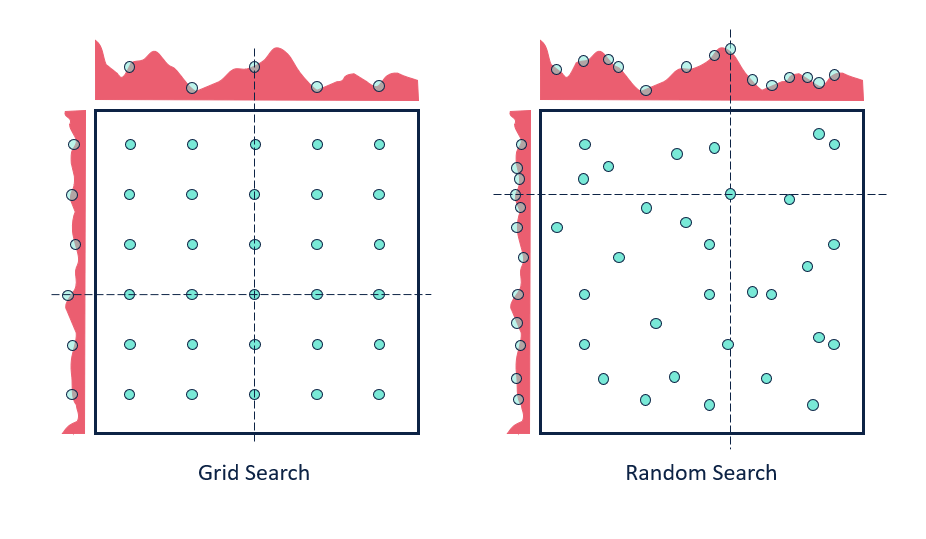

In [18]:
display.Image("./gridvsrandomcv.png")

# Recreate the Random Forest Model with the best found hyperparameters

In [19]:
model = RandomForestRegressor(
    n_estimators=best_parameters['n_estimators'],
    max_features=best_parameters['max_features'],
    random_state=best_parameters['random_state'],
    bootstrap=best_parameters['bootstrap'],
)
model.fit(x_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=500, random_state=1)

# Now running the model on the test set

In [20]:
predict = model.predict(x_test)

array([3350.53311426, 3396.96389111, 3375.2229834 , 3407.39290771,
       3445.18094727, 3478.5811748 , 3514.29700586, 3516.94687598,
       3500.10575342, 3474.60663184, 3497.18187012, 3449.19992871,
       3449.70499658, 3443.3318418 , 3443.14204004, 3461.25294873,
       3416.29044824, 3390.6783291 , 3282.62474658, 3306.99999365,
       3278.20389746, 3310.02973682, 3367.20744971, 3433.97126123,
       3507.27068652, 3509.67948389, 3552.2519126 , 3532.76184912,
       3556.65672607, 3544.50708691])

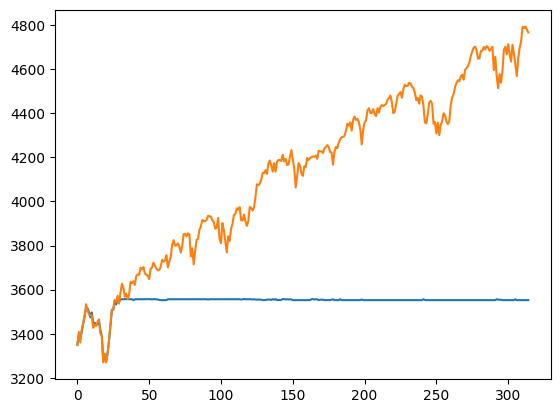

In [21]:
plt.plot(range(predict.shape[0]), predict)
plt.plot(range(y_test.shape[0]), y_test)
predict[:30]

# References

https://medium.com/@maryamuzakariya/project-predict-stock-prices-using-random-forest-regression-model-in-python-fbe4edf01664#:~:text=The%20random%20forest%20regression%20model,based%20on%20the%20predicted%20values